In [1]:
from environment import GridEnv
from mc import MonteCarlo

import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

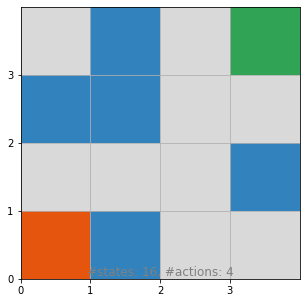

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
)

## Analysis of Monte Carlo

### Hyperparameters: epsilon_start=1, epsilon_decay=0.9995, gamma=1.0, episodes=1000

In [4]:
mc_gamma_1 = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.9995,
    gamma=1.0,
    episodes=4000,
)

# train 
policy1, Q1 = mc_gamma_1.run()
# evaluate
mc_gamma_1.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc_gamma_1.env.w, mc_gamma_1.env.h), unicode=True)
for key, value in policy1.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'u'],
           ['r', 'r', 'r', 'u'],
           ['u', 'u', 'u', 'u'],
           ['u', 'u', 'r', 'u']], dtype='<U1')

### Training

Text(0.5, 1.0, 'Average bad states per episode')

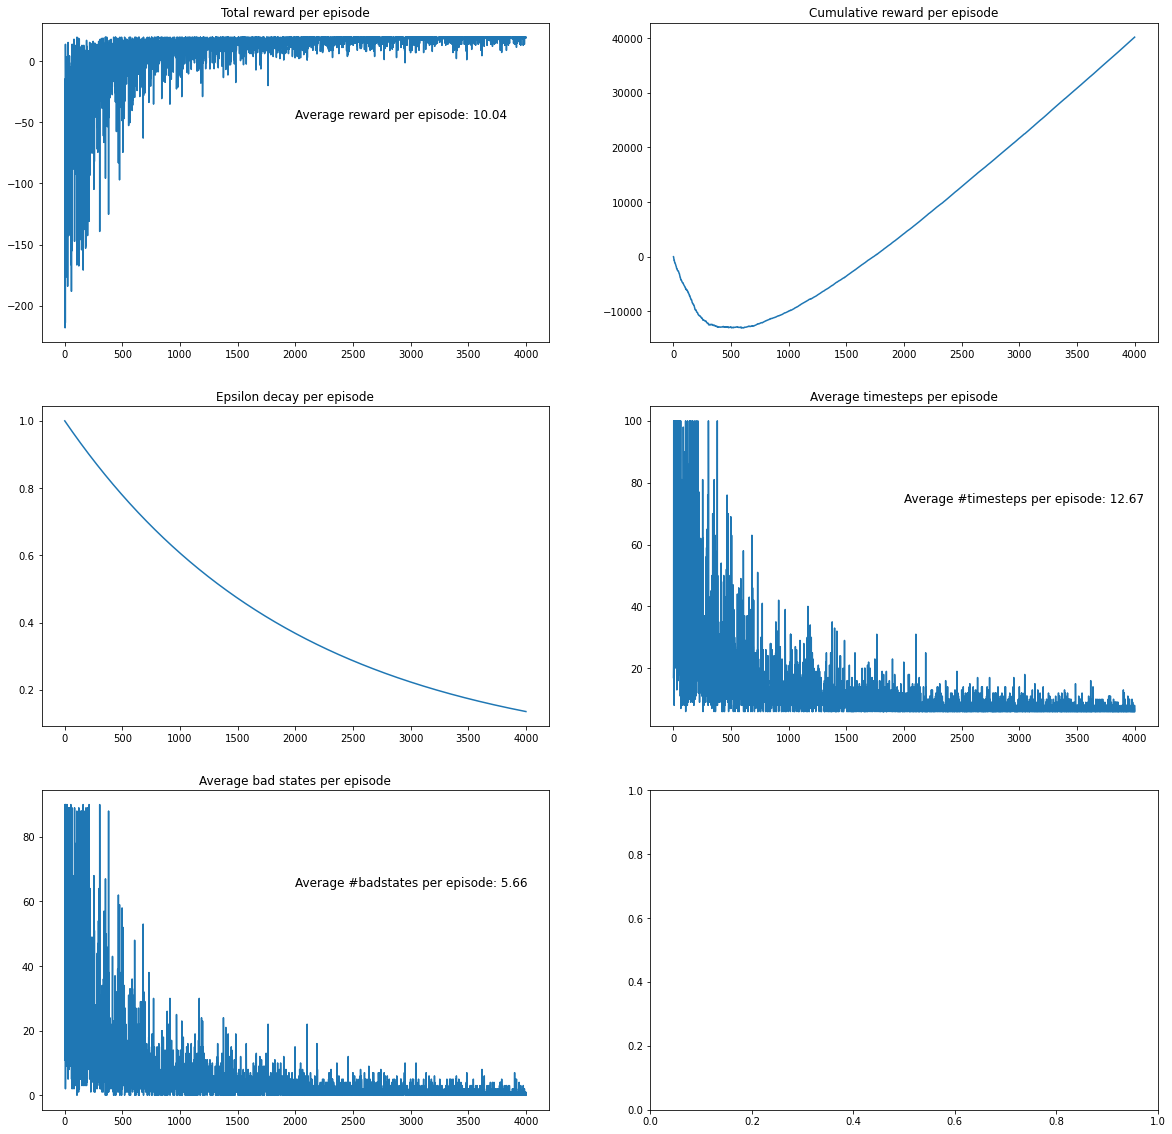

In [27]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in mc_gamma_1.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(mc_gamma_1.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in mc_gamma_1.logs.items()]
ax[0][1].plot(range(mc_gamma_1.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_gamma_1.episodes), [log['epsilon'] for _, log in mc_gamma_1.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

timesteps = [log['timesteps'] for _, log in mc_gamma_1.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(mc_gamma_1.episodes), timesteps)
ax[1][1].text(0.5, 0.7, f'Average #timesteps per episode: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')

bad_state_count = [log['bad_state_count'] for _, log in mc_gamma_1.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(mc_gamma_1.episodes), [log['bad_state_count'] for _, log in mc_gamma_1.logs.items()])
ax[2][0].text(0.5, 0.7, f'Average #badstates per episode: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')

### During Evaluation

Text(0.5, 1.0, 'Average bad states per episode')

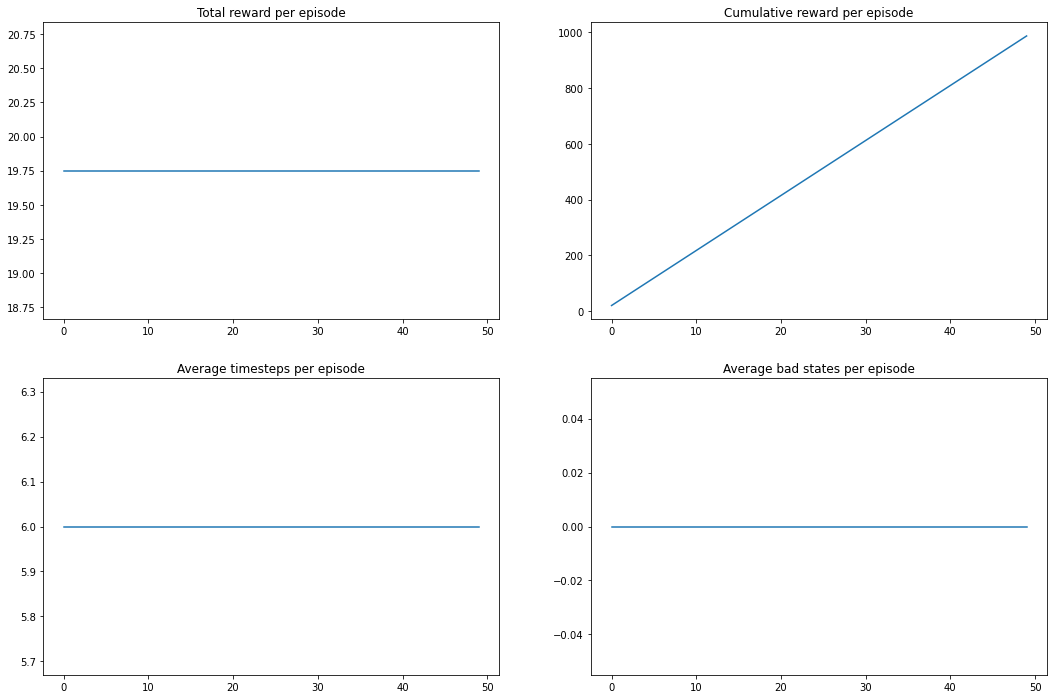

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].plot(range(mc_gamma_1.eval_episodes), [log['reward'] for _, log in mc_gamma_1.eval_logs.items()])
ax[0][0].set_title('Total reward per episode')

ax[0][1].plot(range(mc_gamma_1.eval_episodes), [log['cumulative_reward'] for _, log in mc_gamma_1.eval_logs.items()])
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_gamma_1.eval_episodes), [log['timesteps'] for _, log in mc_gamma_1.eval_logs.items()])
ax[1][0].set_title('Average timesteps per episode')

ax[1][1].plot(range(mc_gamma_1.eval_episodes), [log['bad_state_count'] for _, log in mc_gamma_1.eval_logs.items()])
ax[1][1].set_title('Average bad states per episode')

### Hyperparameters: epsilon_start=1, epsilon_decay=0.9995, gamma=0.0, episodes=1000

In [7]:
mc_gamma_2 = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.9995,
    gamma=0.0,
    episodes=4000,
)

# train 
policy2, Q2 = mc_gamma_2.run()
# evaluate
mc_gamma_2.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc_gamma_2.env.w, mc_gamma_2.env.h), unicode=True)
for key, value in policy2.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'u'],
           ['u', 'r', 'r', 'u'],
           ['u', 'r', 'u', 'u'],
           ['u', 'r', 'r', 'u']], dtype='<U1')

### Training

Text(0.5, 1.0, 'Average bad states per episode')

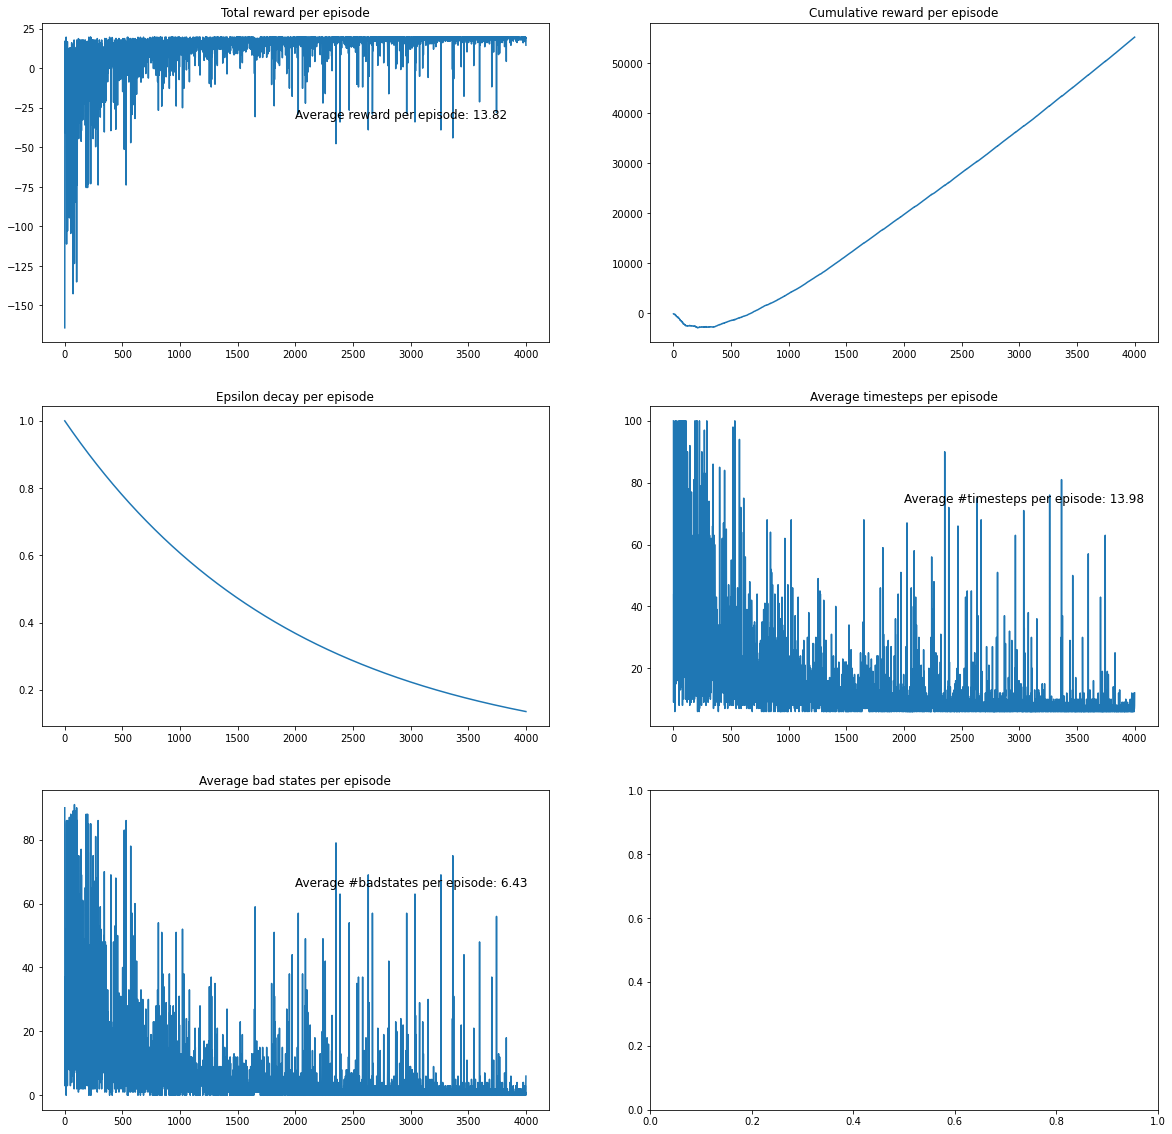

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in mc_gamma_2.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(mc_gamma_2.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in mc_gamma_2.logs.items()]
ax[0][1].plot(range(mc_gamma_2.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_gamma_2.episodes), [log['epsilon'] for _, log in mc_gamma_2.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

timesteps = [log['timesteps'] for _, log in mc_gamma_2.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(mc_gamma_2.episodes), timesteps)
ax[1][1].text(0.5, 0.7, f'Average #timesteps per episode: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')

bad_state_count = [log['bad_state_count'] for _, log in mc_gamma_2.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(mc_gamma_2.episodes), [log['bad_state_count'] for _, log in mc_gamma_2.logs.items()])
ax[2][0].text(0.5, 0.7, f'Average #badstates per episode: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')

### During Evaluation

Text(0.5, 1.0, 'Average bad states per episode')

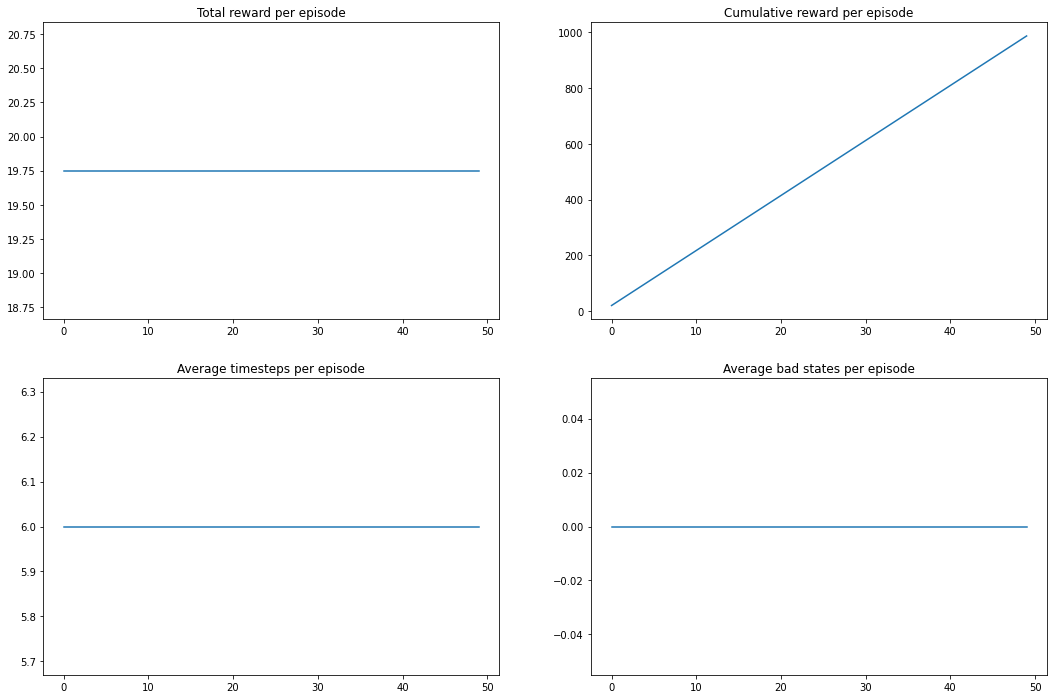

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].plot(range(mc_gamma_2.eval_episodes), [log['reward'] for _, log in mc_gamma_2.eval_logs.items()])
ax[0][0].set_title('Total reward per episode')

ax[0][1].plot(range(mc_gamma_2.eval_episodes), [log['cumulative_reward'] for _, log in mc_gamma_2.eval_logs.items()])
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_gamma_2.eval_episodes), [log['timesteps'] for _, log in mc_gamma_2.eval_logs.items()])
ax[1][0].set_title('Average timesteps per episode')

ax[1][1].plot(range(mc_gamma_2.eval_episodes), [log['bad_state_count'] for _, log in mc_gamma_2.eval_logs.items()])
ax[1][1].set_title('Average bad states per episode')

### Hyperparameters: epsilon_start=1, epsilon_decay=0.9995, gamma=0.5, episodes=1000

In [10]:
mc_gamma_3 = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.9995,
    gamma=0.5,
    episodes=4000,
)

# train 
policy3, Q3 = mc_gamma_3.run()
# evaluate
mc_gamma_3.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc_gamma_3.env.w, mc_gamma_3.env.h), unicode=True)
for key, value in policy3.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'r'],
           ['r', 'r', 'r', 'u'],
           ['u', 'r', 'u', 'u'],
           ['u', 'r', 'u', 'u']], dtype='<U1')

### Training

Text(0.5, 1.0, 'Average bad states per episode')

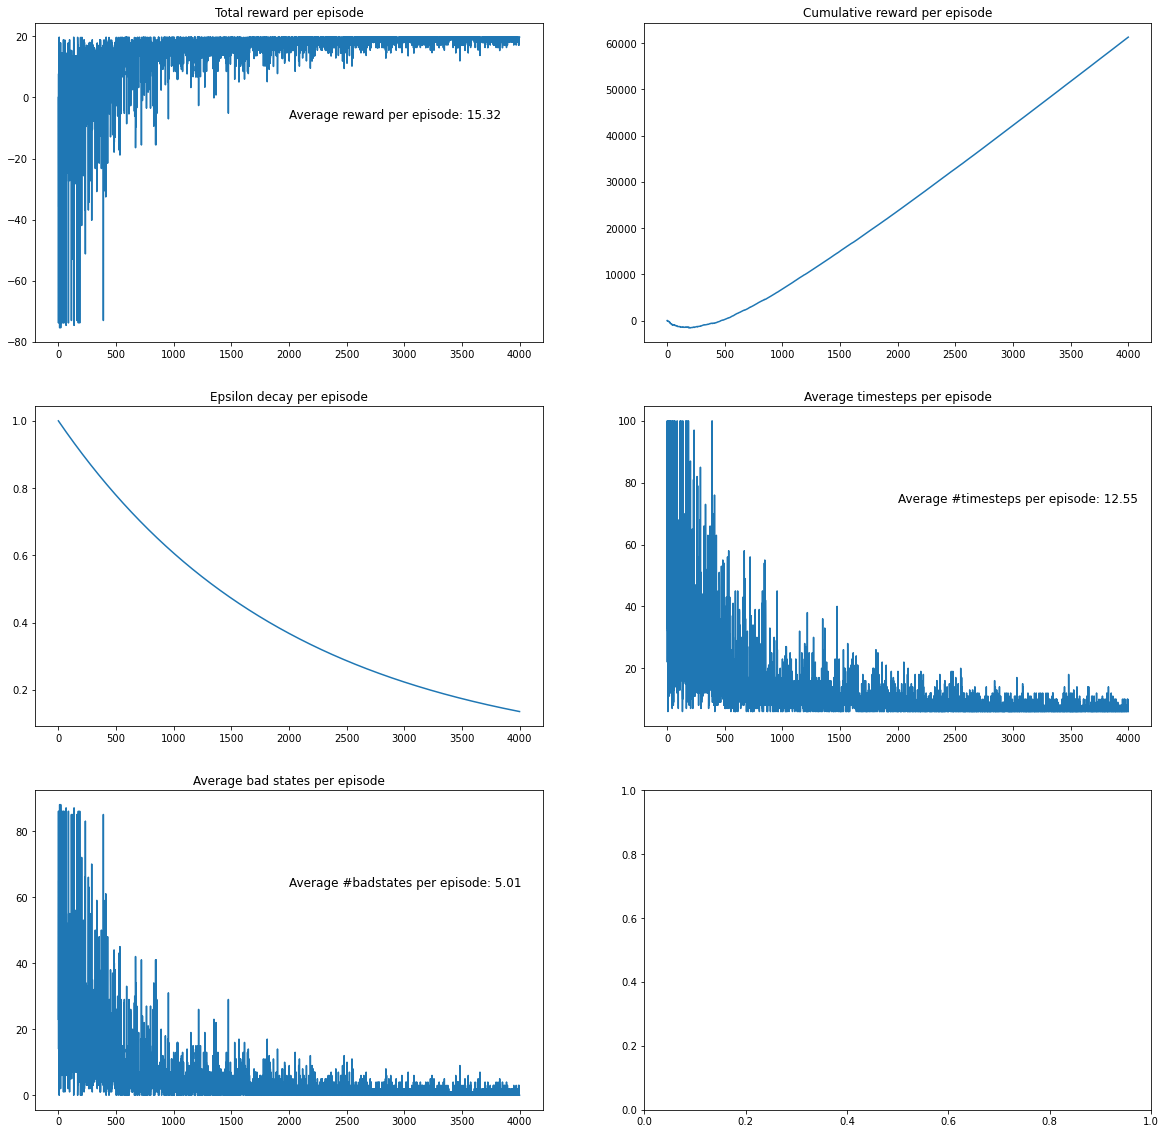

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in mc_gamma_3.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(mc_gamma_3.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in mc_gamma_3.logs.items()]
ax[0][1].plot(range(mc_gamma_3.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_gamma_3.episodes), [log['epsilon'] for _, log in mc_gamma_3.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

timesteps = [log['timesteps'] for _, log in mc_gamma_3.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(mc_gamma_3.episodes), timesteps)
ax[1][1].text(0.5, 0.7, f'Average #timesteps per episode: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')

bad_state_count = [log['bad_state_count'] for _, log in mc_gamma_3.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(mc_gamma_3.episodes), [log['bad_state_count'] for _, log in mc_gamma_3.logs.items()])
ax[2][0].text(0.5, 0.7, f'Average #badstates per episode: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')

### During Evaluation

Text(0.5, 1.0, 'Average bad states per episode')

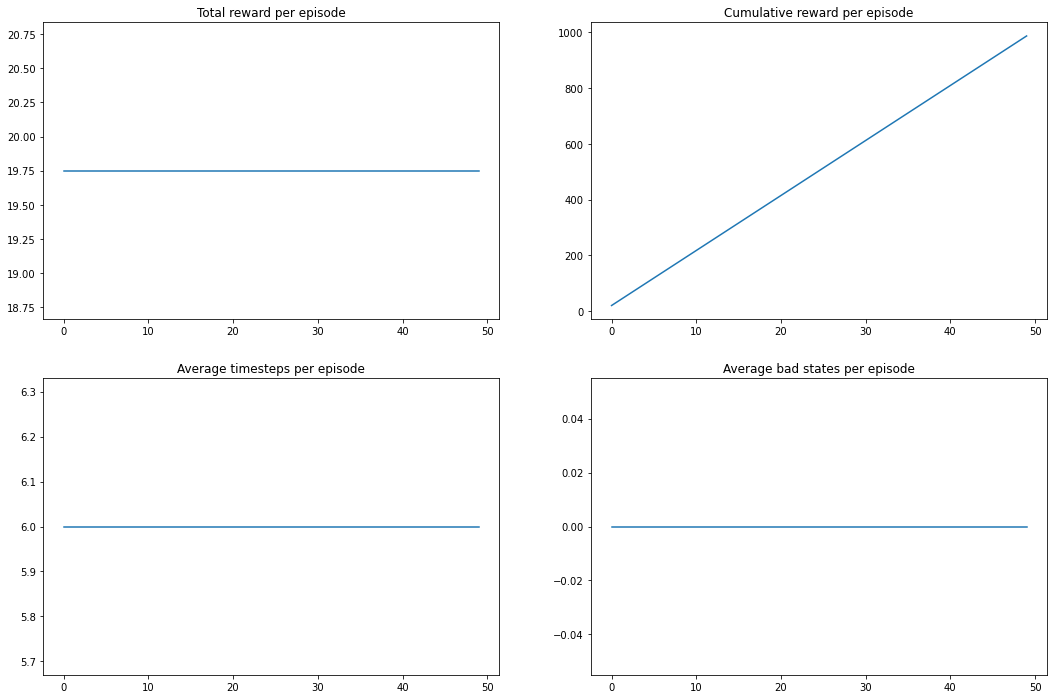

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].plot(range(mc_gamma_3.eval_episodes), [log['reward'] for _, log in mc_gamma_3.eval_logs.items()])
ax[0][0].set_title('Total reward per episode')

ax[0][1].plot(range(mc_gamma_3.eval_episodes), [log['cumulative_reward'] for _, log in mc_gamma_3.eval_logs.items()])
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_gamma_3.eval_episodes), [log['timesteps'] for _, log in mc_gamma_3.eval_logs.items()])
ax[1][0].set_title('Average timesteps per episode')

ax[1][1].plot(range(mc_gamma_3.eval_episodes), [log['bad_state_count'] for _, log in mc_gamma_3.eval_logs.items()])
ax[1][1].set_title('Average bad states per episode')

### Hyperparameters: epsilon_start=1, epsilon_decay=0.9998, gamma=0.9, episodes=1000

### Training

In [13]:
mc_ed_1 = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.9998,
    gamma=0.9,
    episodes=1000,
)

# train 
policy_1e, Q_1e = mc_ed_1.run()
# evaluate
mc_ed_1.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc_ed_1.env.w, mc_ed_1.env.h), unicode=True)
for key, value in policy_1e.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'r'],
           ['r', 'r', 'u', 'u'],
           ['u', 'u', 'u', 'u'],
           ['u', 'r', 'u', 'u']], dtype='<U1')

Text(0.5, 1.0, 'Average bad states per episode')

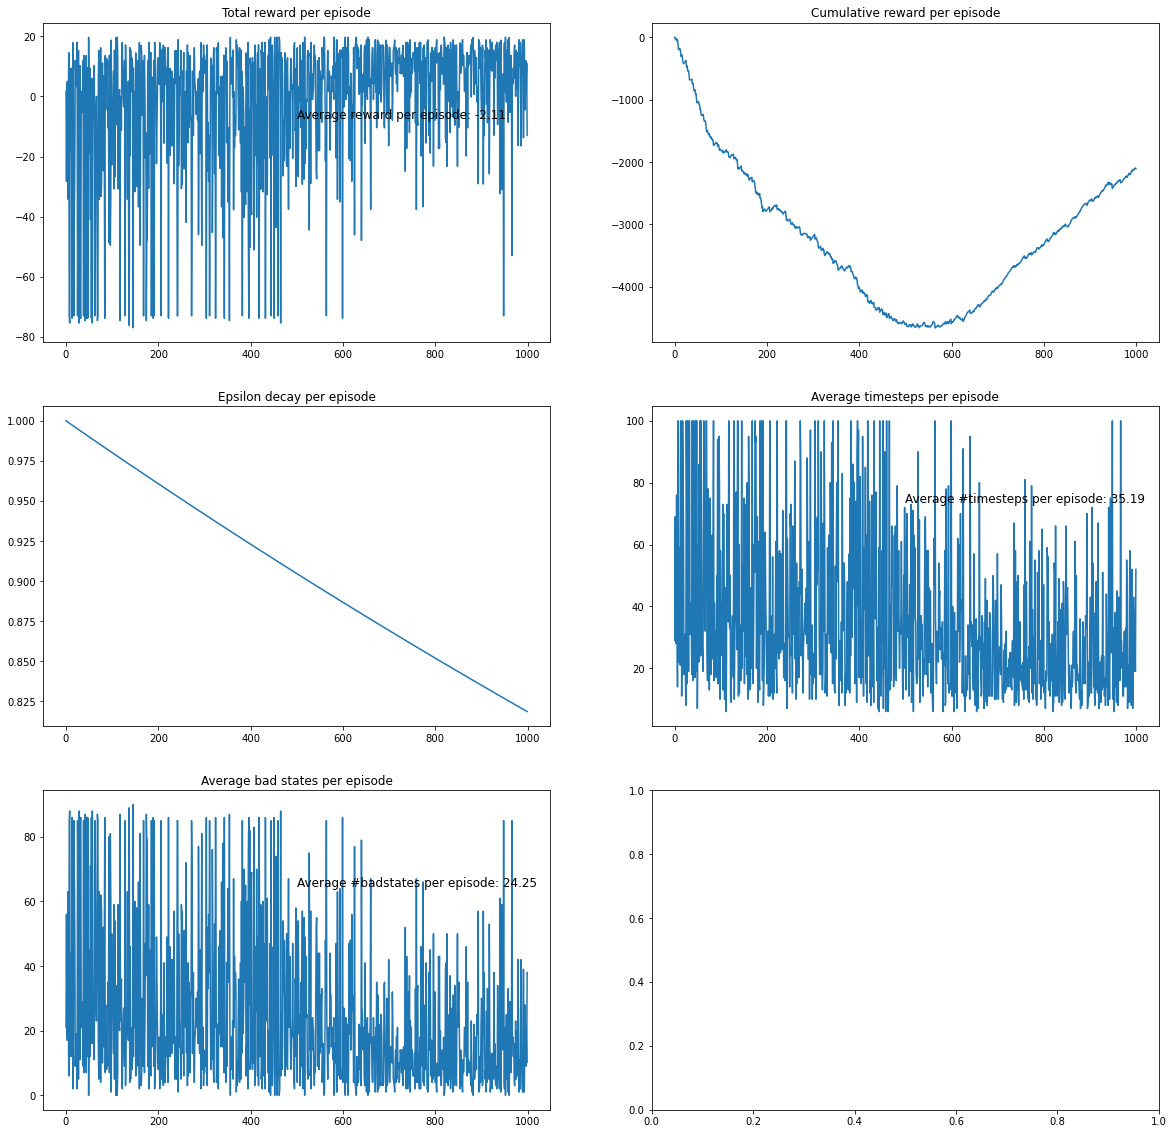

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in mc_ed_1.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(mc_ed_1.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in mc_ed_1.logs.items()]
ax[0][1].plot(range(mc_ed_1.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_ed_1.episodes), [log['epsilon'] for _, log in mc_ed_1.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

timesteps = [log['timesteps'] for _, log in mc_ed_1.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(mc_ed_1.episodes), timesteps)
ax[1][1].text(0.5, 0.7, f'Average #timesteps per episode: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')

bad_state_count = [log['bad_state_count'] for _, log in mc_ed_1.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(mc_ed_1.episodes), [log['bad_state_count'] for _, log in mc_ed_1.logs.items()])
ax[2][0].text(0.5, 0.7, f'Average #badstates per episode: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')

### During Evaluation

Text(0.5, 1.0, 'Average bad states per episode')

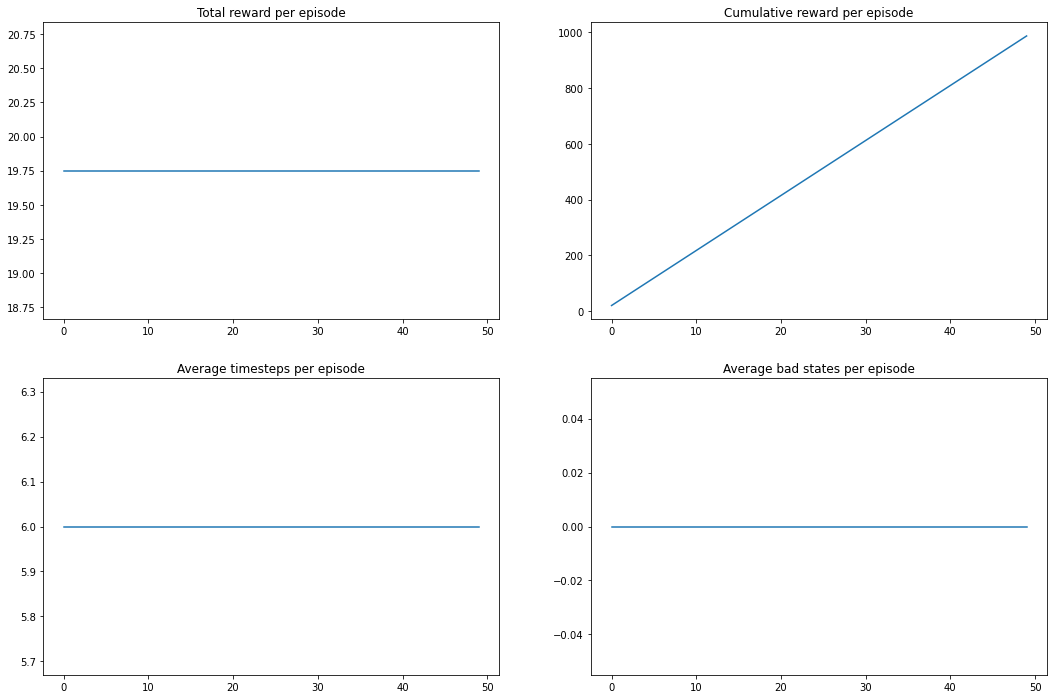

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].plot(range(mc_ed_1.eval_episodes), [log['reward'] for _, log in mc_ed_1.eval_logs.items()])
ax[0][0].set_title('Total reward per episode')

ax[0][1].plot(range(mc_ed_1.eval_episodes), [log['cumulative_reward'] for _, log in mc_ed_1.eval_logs.items()])
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_ed_1.eval_episodes), [log['timesteps'] for _, log in mc_ed_1.eval_logs.items()])
ax[1][0].set_title('Average timesteps per episode')

ax[1][1].plot(range(mc_ed_1.eval_episodes), [log['bad_state_count'] for _, log in mc_ed_1.eval_logs.items()])
ax[1][1].set_title('Average bad states per episode')

### Hyperparameters: epsilon_start=1, epsilon_decay=0.995, gamma=0.9, episodes=1000

### Training

In [16]:
mc_ed_2 = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.995,
    gamma=0.9,
    episodes=1000,
)

# train 
policy_2e, Q_2e = mc_ed_2.run()
# evaluate
mc_ed_2.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc_ed_2.env.w, mc_ed_2.env.h), unicode=True)
for key, value in policy_2e.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'u'],
           ['r', 'r', 'u', 'u'],
           ['u', 'u', 'u', 'u'],
           ['u', 'r', 'r', 'u']], dtype='<U1')

Text(0.5, 1.0, 'Average bad states per episode')

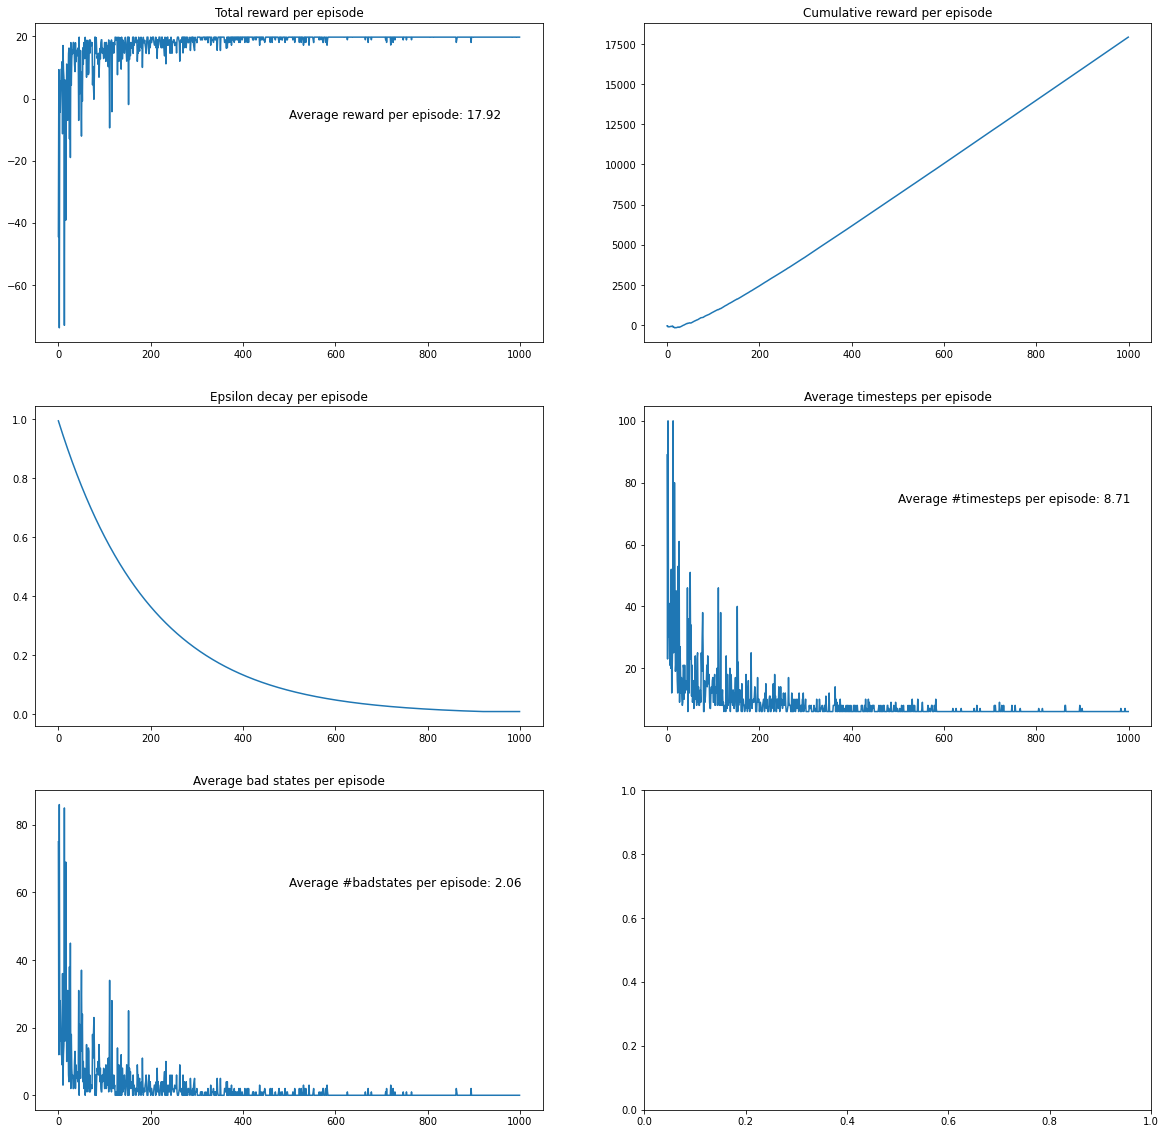

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in mc_ed_2.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(mc_ed_2.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in mc_ed_2.logs.items()]
ax[0][1].plot(range(mc_ed_2.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_ed_2.episodes), [log['epsilon'] for _, log in mc_ed_2.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

timesteps = [log['timesteps'] for _, log in mc_ed_2.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(mc_ed_2.episodes), timesteps)
ax[1][1].text(0.5, 0.7, f'Average #timesteps per episode: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')

bad_state_count = [log['bad_state_count'] for _, log in mc_ed_2.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(mc_ed_2.episodes), [log['bad_state_count'] for _, log in mc_ed_2.logs.items()])
ax[2][0].text(0.5, 0.7, f'Average #badstates per episode: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')

### During Evaluation

Text(0.5, 1.0, 'Average bad states per episode')

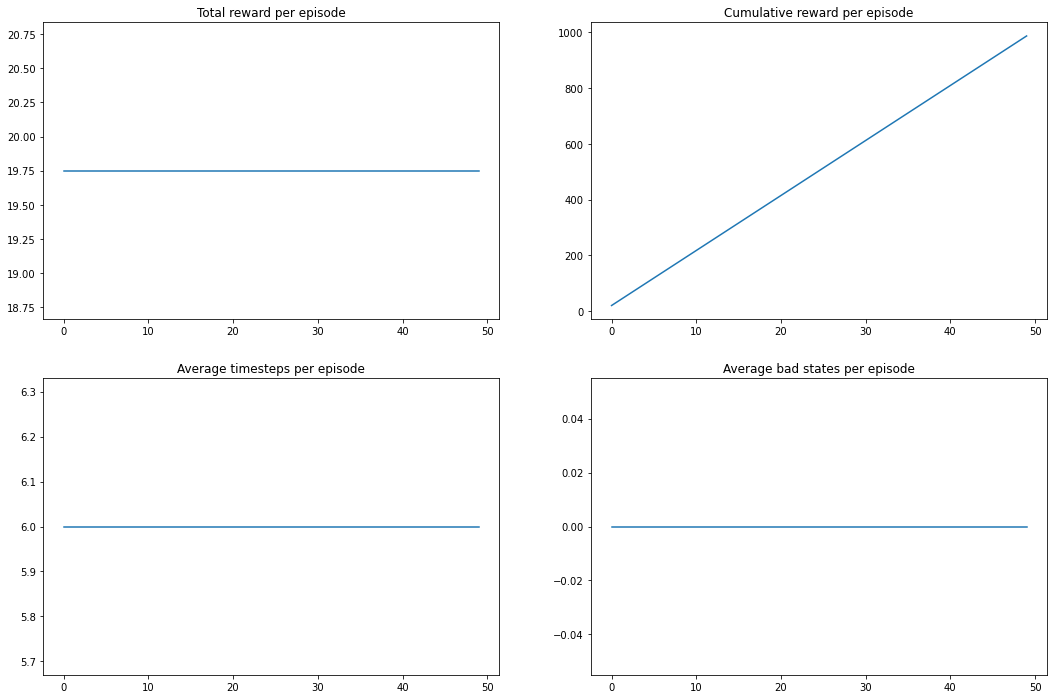

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].plot(range(mc_ed_2.eval_episodes), [log['reward'] for _, log in mc_ed_2.eval_logs.items()])
ax[0][0].set_title('Total reward per episode')

ax[0][1].plot(range(mc_ed_2.eval_episodes), [log['cumulative_reward'] for _, log in mc_ed_2.eval_logs.items()])
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_ed_2.eval_episodes), [log['timesteps'] for _, log in mc_ed_2.eval_logs.items()])
ax[1][0].set_title('Average timesteps per episode')

ax[1][1].plot(range(mc_ed_2.eval_episodes), [log['bad_state_count'] for _, log in mc_ed_2.eval_logs.items()])
ax[1][1].set_title('Average bad states per episode')

### Hyperparameters: epsilon_start=1, epsilon_decay=0.99995, gamma=0.9, episodes=1000

### Training

In [19]:
mc_ed_3 = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.99995,
    gamma=0.9,
    episodes=1000,
)

# train 
policy_3e, Q_3e = mc_ed_3.run()
# evaluate
mc_ed_3.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc_ed_3.env.w, mc_ed_3.env.h), unicode=True)
for key, value in policy_3e.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'u'],
           ['r', 'r', 'u', 'u'],
           ['u', 'u', 'u', 'u'],
           ['u', 'r', 'u', 'u']], dtype='<U1')

Text(0.5, 1.0, 'Average bad states per episode')

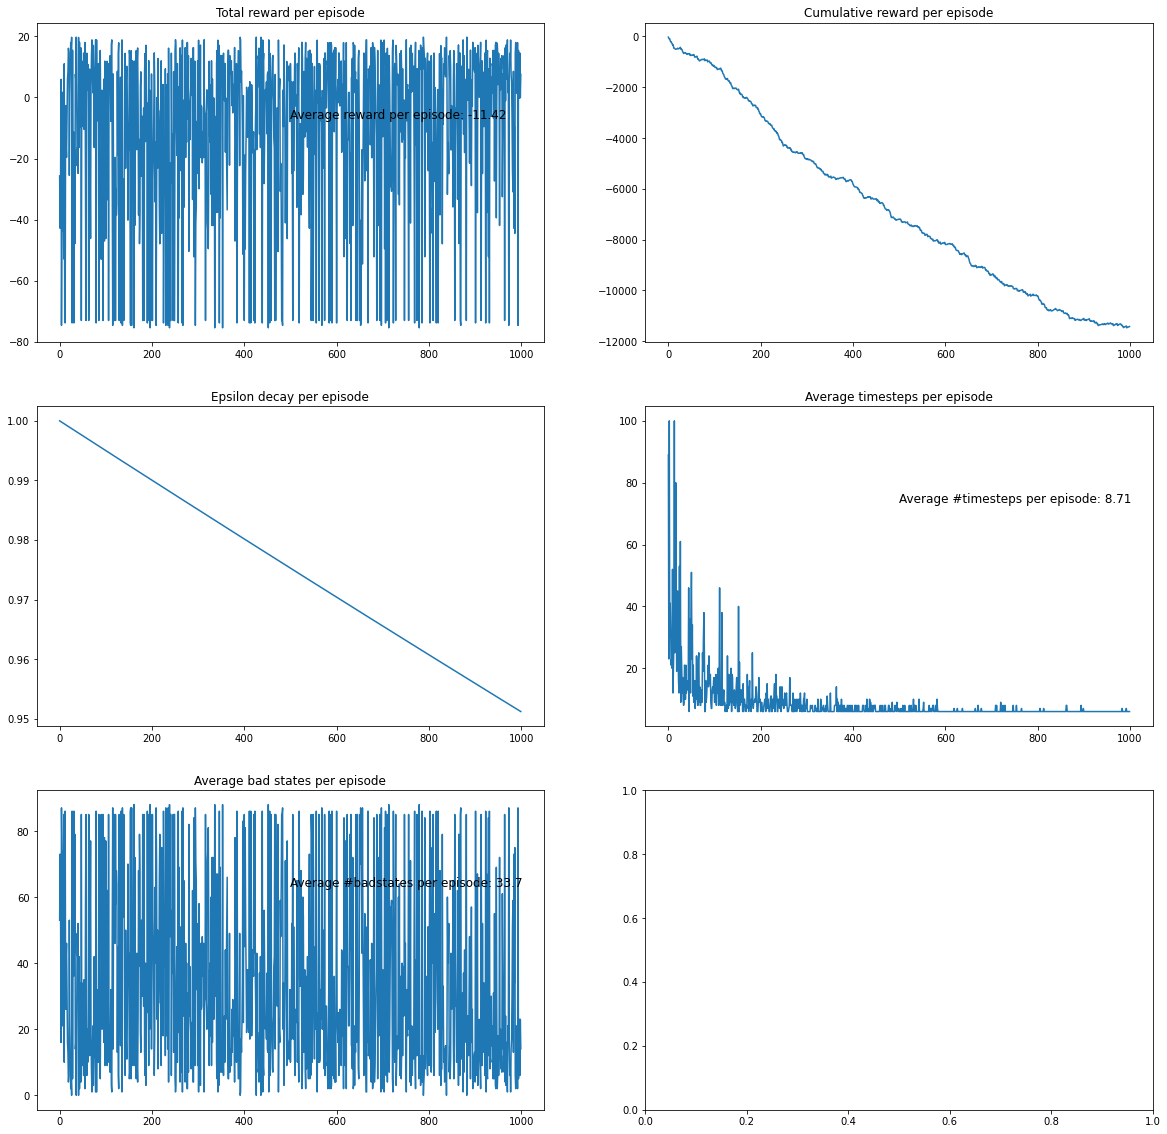

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in mc_ed_3.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(mc_ed_3.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in mc_ed_3.logs.items()]
ax[0][1].plot(range(mc_ed_3.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_ed_3.episodes), [log['epsilon'] for _, log in mc_ed_3.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

timesteps = [log['timesteps'] for _, log in mc_ed_2.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(mc_ed_3.episodes), timesteps)
ax[1][1].text(0.5, 0.7, f'Average #timesteps per episode: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')

bad_state_count = [log['bad_state_count'] for _, log in mc_ed_3.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(mc_ed_3.episodes), [log['bad_state_count'] for _, log in mc_ed_3.logs.items()])
ax[2][0].text(0.5, 0.7, f'Average #badstates per episode: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')

### During Evaluation

Text(0.5, 1.0, 'Average bad states per episode')

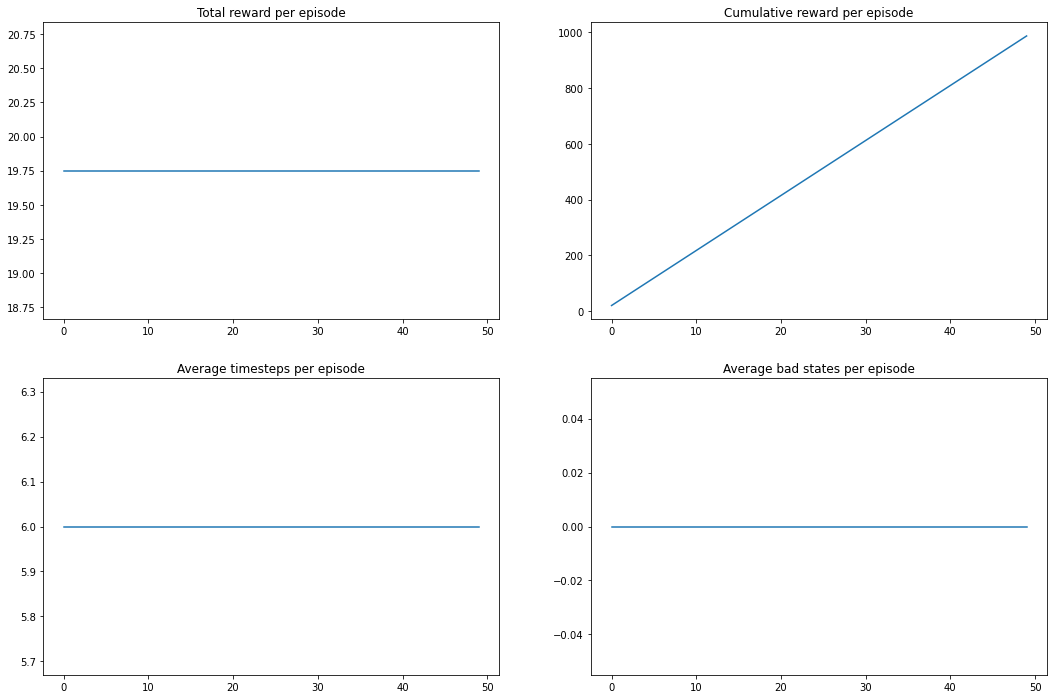

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].plot(range(mc_ed_3.eval_episodes), [log['reward'] for _, log in mc_ed_3.eval_logs.items()])
ax[0][0].set_title('Total reward per episode')

ax[0][1].plot(range(mc_ed_3.eval_episodes), [log['cumulative_reward'] for _, log in mc_ed_3.eval_logs.items()])
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(mc_ed_3.eval_episodes), [log['timesteps'] for _, log in mc_ed_3.eval_logs.items()])
ax[1][0].set_title('Average timesteps per episode')

ax[1][1].plot(range(mc_ed_3.eval_episodes), [log['bad_state_count'] for _, log in mc_ed_3.eval_logs.items()])
ax[1][1].set_title('Average bad states per episode')